In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import jieba  # 分词包
from wordcloud import WordCloud, ImageColorGenerator    # 词云包
from scipy.misc import imread

In [3]:
df = pd.read_csv('./Acfun_usr_mes.csv',sep=',')

In [4]:
df.shape

(39542, 2)

In [5]:
stopwords = pd.read_csv("../data/stopwords.txt", index_col=False,quoting=3, sep='\t', names=['stopword'], encoding="utf8")

In [6]:
df.head()

,userid,message
0,3859422e,['剧透：奇犽出现，少女化' '这集有 奇犽半裸的画面哦~~！！' '开酒' '呀！！o(≧...
1,5e733973,['另一个补番的乃在吗。。。']
2,366cf67f,['不想看吵架的请屏蔽 难听、烂、剧透、垃圾、优越' '逻辑没问题么 猫女是去找茬的好么']
3,94d849aa,['h']
4,235a82a0,['我是3001' '漫画肉！！！！！' '漫画肉！！！！！！']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True,min_df=5,norm='l2',encoding='latin-1',

ngram_range=(1,2),stop_words='english')

features = tfidf.fit_transform(df.message).toarray()

In [8]:
features.shape

(39542, 5241)

In [9]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
def cutlen(text):
    return len(text)

In [11]:
df['len']=df['message'].map(cutlen)

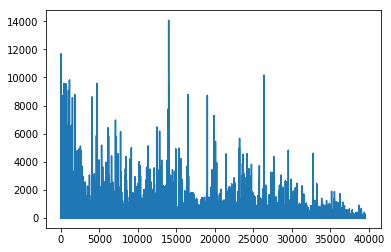

In [12]:
plt.plot(df.index,df.len)

In [14]:
from sklearn.cluster import KMeans

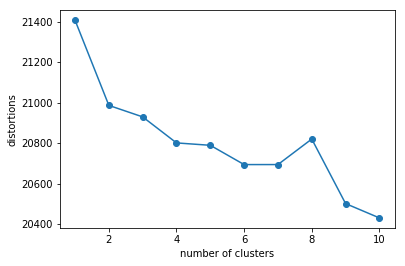

In [41]:
d=[]
for i in range(1,11):    #k取值1~11，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(features)
    d.append(km.inertia_)  #inertia簇内误差平方和

plt.plot(range(1,11),d,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()

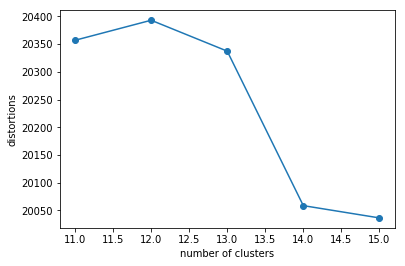

In [42]:
d=[]
for i in range(11,16):    #k取值1~11，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(features)
    d.append(km.inertia_)  #inertia簇内误差平方和

plt.plot(range(11,16),d,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4)

In [54]:
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
y_ = kmeans.predict(features)

In [70]:
kmeans.inertia_

20936.438814070276

In [56]:
df['class']=y_

In [57]:
y_list=[]
for i in range(4):
    y_sum=(df['class']==i).sum()
    y_list.append(y_sum)
y_list

[38520, 115, 22, 885]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


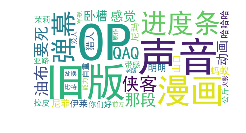

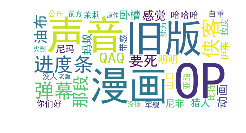

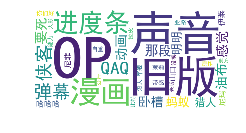

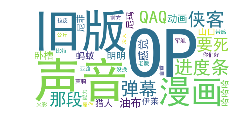

In [78]:
for i in range(4):    
    cond = df['class']==2
    testword = ' '.join(df[cond].message.values)
    segtests = jieba.cut(testword)
    segment = []
    for seg in segtests:
        if len(seg) > 1 and seg != '\r\n':
            segment.append(seg)
    words_df = pd.DataFrame({'segment': segment})
    words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
    words_stat = words_df.groupby(by=['segment'])['segment'].agg({"count": np.size})
    words_stat = words_stat.reset_index().sort_values(by="count", ascending=False)
    content = ' '.join(words_stat.head(40).segment.values)
    wordcloud = WordCloud(font_path='simhei.ttf', background_color="white",max_words=40).generate(content)
    plt.figure(figsize=(12,8))
    axes = plt.subplot(2,3,i+1)
    axes.axis("off")
    axes.imshow(wordcloud)
plt.show()



In [63]:
df[cond1].message.values

array(["['233' '警察叔叔  快抓这个人' '叔叔  你够了' '我的巨人好歹有嘴巴' '妈妈  教官的画风不一样' '哈哈2333' '2333'\r\n '哈哈   ' '服部  你不是忍者么' '钓回来了' '叔 你够了  快穿衣服' '说话不带喘   真厉害' '阿'\r\n '好像银桑小时候阿   奇犽' '好像银桑小时候  奇犽' '笨蛋王子即视感' '好像真的没有女的猎人阿' '。。' '2333'\r\n '要怀孕了  ' '警察叔叔  只有他画风不一样' '跟银桑小时候一模一样如果是红瞳的话' '2333怎么办' '好萌阿    ' '颜艺真高'\r\n '。。卧槽' '真是青春啊' '好可爱阿  真受不了' '快点打好么' '原来有女的阿' '、这是什么生物' '2333' '2333'\r\n '天然诶' '天然黑' '绝逼天然黑' '笨蛋王子嘛' '笨蛋王子' '。。' '作死' '大逃杀即视感加一' 'ICBM'\r\n '少年  你的号码牌呢' '求各种不剧透好么' '痔疮  卖萌可耻~~！！' '真你妹细阿' '神同步' '好可爱阿' '笨蛋王子' '人妻'\r\n '警察叔叔  快来抓他' '太害怕了。。？' '你们弄得我都不纯洁了' '不哭不哭  站起来' '混蛋  你们够了' '妈妈阿' '人妻'\r\n 'QUQ' 'QAQ' '心算不好' '笨蛋王子出现了' '现在回去就是神作' '2333  怎么破阿' '2333' '衬衫'\r\n '衬衫衬衫衬衫！！！！' '衬衫衬衫' '绝对是兵长' '妈妈   有变态' '刚想说怎么没有BGM' '自带BGM的男人' '抖S无误'\r\n '颜艺真高' '猫脸可爱' '不准打这么帅的炮灰的颜！！！' '高跟鞋？？' '看谁睡怀孕' ' mjza，/\\\\K,C\\\\`'\r\n '已经会分身了？？？' '吐舌头的抖犯规' '自重' '笨蛋王子 笨蛋王子 笨蛋王子~~~出现了' '喂  别把奇犽忽略好么' '画质好评'\r\n '卧槽 好萌' '人妻' '好萌' '好萌好萌' '哈哈' '哈哈' '猫脸、傲娇' '好可爱！~~！！、' '心疼阿。' '卧槽'\r\n '真心的爱阿  这都是' '爆虐阿   卧槽' '包子脸' '李狗蛋出现了' '核能反应  高能注意'

In [58]:
cond1 = df['class']==1
df[cond1]

,userid,message,len,class
667,ea7027bd,['233' '警察叔叔 快抓这个人' '叔叔 你够了' '我的巨人好歹有嘴巴' '妈妈...,1155,1
672,7421dfbd,['天然。。。黑…………' '2333' 'CV好爱' '据说没有嘴' '无口…………' '...,454,1
733,322981e4,['奇犽!!!!' '最多只跑过2000米...' '我只能跑2000m...' '到现在都...,1456,1
1573,d5fdb15e,['384 2333' '弗利沙 大蛇丸 登势婆婆= =' '吓跑了5666' '2333真...,869,1
1629,b8089760,['西索配音挺好的啊0 0' '一定要吐槽的滑板颜色。。=_=' 'BGM转换不自然爆了' ...,1009,1
1656,bfb55c96,['没血？' '巨人' '因为这个根本不是鸡蛋' '海尔兄弟' '说好的录像呢' '什么时候...,272,1
1683,3da697db,['刚才的呻吟。。。。。' '狗鼻子啊' '胡子是本体' '剧透死全家+1' '你是狗吗？'...,377,1
3888,316615cf,['为什么是爱心形状❤' '拿错武器了啊少侠！！' '这个AVG游戏一样的BGM2333' ...,538,1
4092,2eb9fa8c,['我是过来看弹幕的啊魂淡' '不做死就不会死' '抽陀螺笑尿' '对啊奇犽卖自己照片就行了...,195,1
4093,0d4397af,['.' '2333' '.'],16,1


In [59]:
cond2 = df['class']==2
df[cond2]

,userid,message,len,class
528,26405b48,['35次都死不掉= =' '哈哈' '旧版不是捏碎了么' '起来了，所以弯着腰' '冈无意...,122,2
669,7134e627,['你被小摊贩骗了···' '吃我大吊' '终于等到了QAQ蚂蚁篇' '成熟我一脸···' ...,157,2
1883,Dc89c4d2,['这声音……'],9,2
4393,a0588108,['还是旧版带感' '口胡 官配明明是杰奇' '摸头呢！（摔' '三兄弟呢！（摔' '调戏俩...,516,2
4455,D94327a0,['才一千出头啊弹幕' '进度条不给力' '进度条傲娇了' '进度条你妹。。' '矮油进度条...,147,2
5347,D02871b5,['老有人吐槽日文发音。。。。。' '男的女的没人说归' '特意把旧版再次看了一遍。。。发现...,289,2
5472,De8e6744,['别托时间了= =' '告白么= =' '这cp分的太明显了.....' '= =突然想起...,120,2
5540,D07b1c94,['90后表示知道猎人比火影早……' 'BGM啊啊啊！！！' '这声音。。这么刚硬。。。'],46,2
6698,00a91525,['马猴烧酒' '菊花啊.......可怜' '红富士.......金富士' '这声音，这肌...,137,2
7661,Ddf66697,['看了第六遍了' '我去……肿么还是这个OP！' '好坑爹' '团长您多大岁数了' '点滴...,110,2


In [60]:
cond3 = df['class']==3
df[cond3]

,userid,message,len,class
915,766b4c44,['新OP！新OP！新OP！' '先是烤猪，寿司在后面啊- -！！！！' '暂停看绿字！！！...,554,3
1074,aee37a58,['奇犽！！！' '奇牙是男的好么' '新op？？'],27,3
1131,ccda7990,['酷拉皮卡也是' '尼玛一大堆挑剔的人 ' '里番画质' 'L鲤鱼王' '新篇章 新OP'...,114,3
1341,03eed0f0,['楼梯跑酷' '不行了我只能给BGM献上我的膝盖' '弗兰奇声音辨识度太高' '团长舔舔舔...,120,3
1384,6ae30964,['给弹幕笑死了' '连我爸都没打过我' '弹幕笑死我了' '233' '红字233' '2...,201,3
1466,4bddf910,['这才是OP啊' '新OP！' '新OP！'],24,3
1746,bd51d876,['0 0 这ED真不好听啊。。。' '火影抄袭这个的吧~~~' '自古枪兵。。。' '丈...,127,3
1813,5ece2491,['新OP!!!' 'BGM的功劳无误' 'who...' '新OP！！！' '見家長了' ...,126,3
1819,0f0f5055,['新OP！' '上升气流！' '新op' '听说这次是新op' '这个能力略bug？' '...,601,3
1999,f60d0d58,['赌五毛出本子' '肚子就是鼓' '原来鸣人佐助抢卡卡西铃铛就是借鉴这一段啊' 'hang...,473,3
